<a href="https://colab.research.google.com/github/King-Debo/3D-Scene-Reconstruction-and-Manipulation-Software/blob/main/IntelliCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape the images to the format (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Define the model architecture
model = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1690 - accuracy: 0.9503 - val_loss: 0.0692 - val_accuracy: 0.9785
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0578 - val_accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0528 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0292 - accuracy: 0.9909 - val_loss: 0.0482 - val_accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0506 - val_accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.0531 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.0545 -

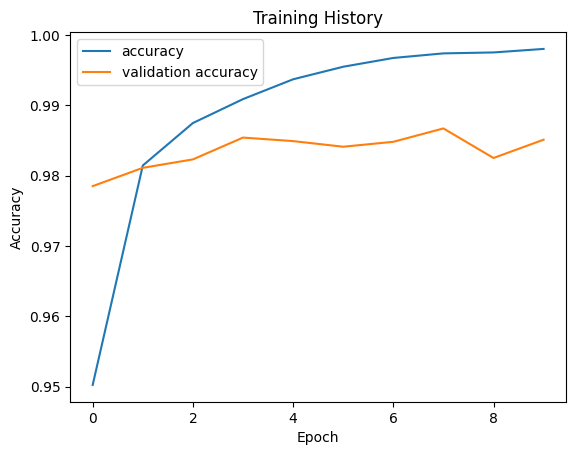

In [4]:
# Train the model
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [5]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0585 - accuracy: 0.9851
Test accuracy: 0.9851


In [6]:
# Save the model
model.save('mnist_cnn_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 92ms/step


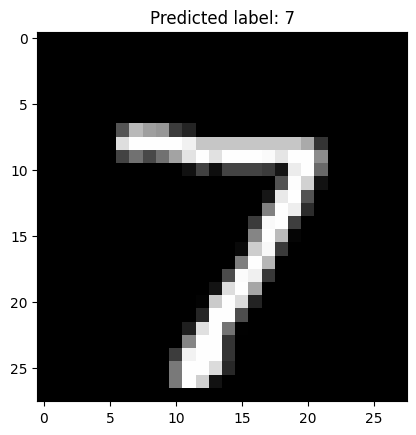

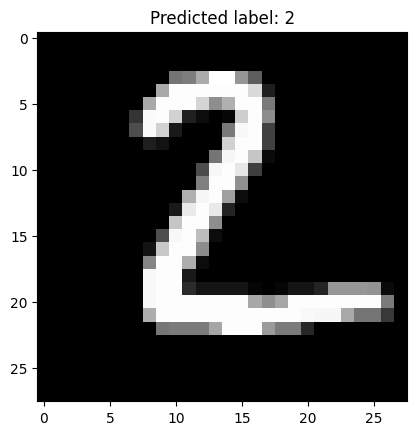

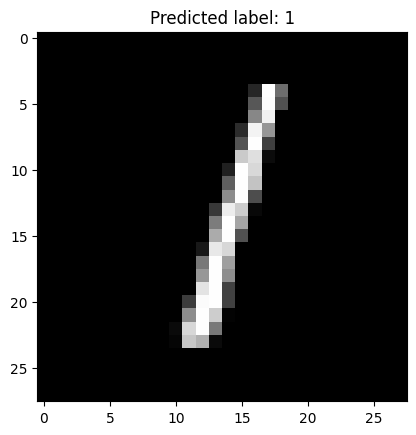

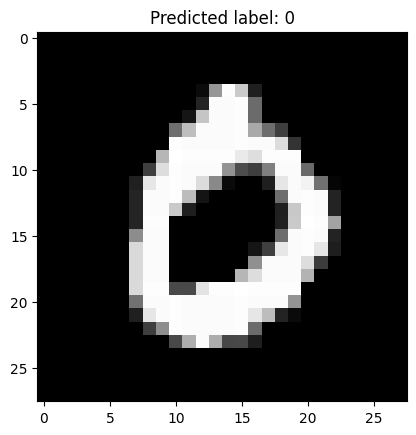

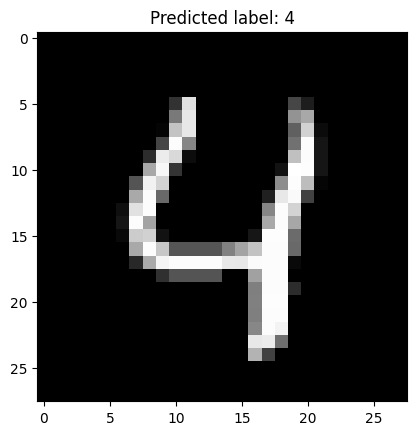

In [7]:
# Predict on the first five test images
predictions = loaded_model.predict(test_images[:5])

# Display the predictions
for i, prediction in enumerate(predictions):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted label: {prediction.argmax()}')
    plt.show()

313/313 [==============================] - 3s 10ms/step


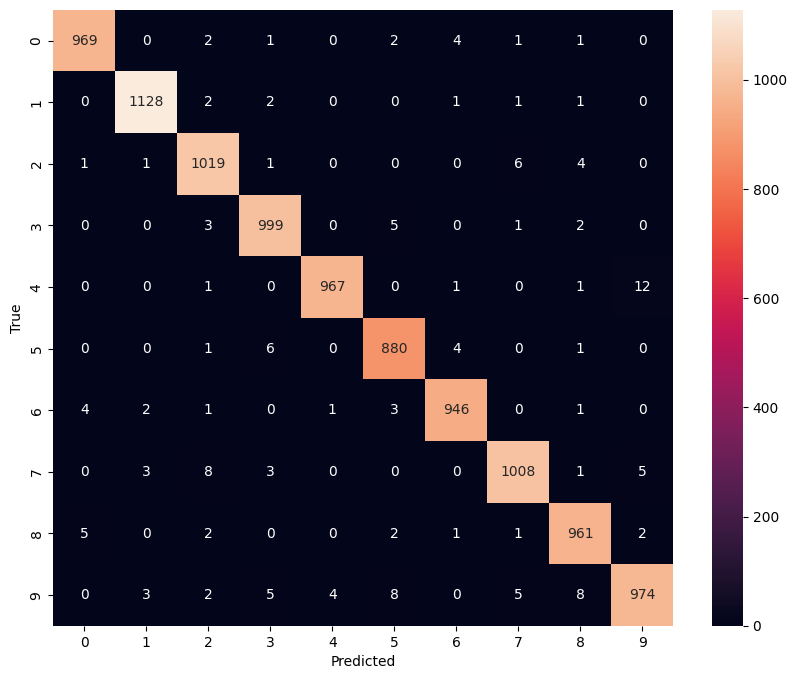

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true labels and predicted labels
true_labels = test_labels.argmax(axis=1)
predicted_labels = loaded_model.predict(test_images).argmax(axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for augmentation
data_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit the generator to the training data
data_generator.fit(train_images)

# Train the model with the augmented data
history = model.fit(data_generator.flow(train_images, train_labels, batch_size=32),
                    validation_data=(test_images, test_labels),
                    steps_per_epoch=len(train_images) / 32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1785 - accuracy: 0.9457 - val_loss: 0.0476 - val_accuracy: 0.9860
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1044 - accuracy: 0.9684 - val_loss: 0.0342 - val_accuracy: 0.9896
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0845 - accuracy: 0.9734 - val_loss: 0.0641 - val_accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0760 - accuracy: 0.9775 - val_loss: 0.0400 - val_accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0695 - accuracy: 0.9784 - val_loss: 0.0419 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0669 - accuracy: 0.9793 - val_loss: 0.0385 - val_accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0630 - accuracy: 0.9804 - val_loss: 0.0315 -

Epoch 1/5
1500/1500 [==============================] - 27s 17ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0145 - val_accuracy: 0.9960
Epoch 2/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0172 - val_accuracy: 0.9943
Epoch 3/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0191 - val_accuracy: 0.9951
Epoch 4/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0148 - val_accuracy: 0.9957
Epoch 5/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0187 - val_accuracy: 0.9951
Epoch 1/5
1500/1500 [==============================] - 27s 17ms/step - loss: 0.0824 - accuracy: 0.9754 - val_loss: 0.0767 - val_accuracy: 0.9774
Epoch 2/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0648 - accuracy: 0.9813 - val_loss: 0.0829 - val_ac

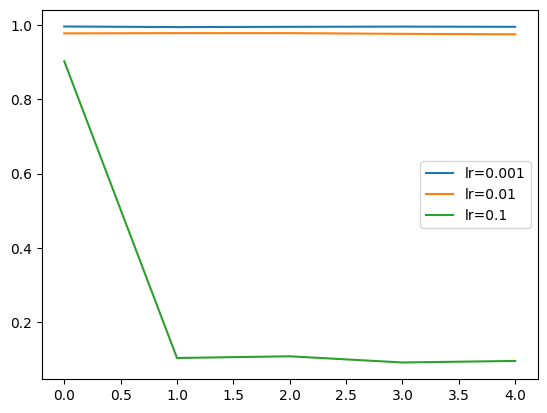

In [10]:
# Example of hyperparameter tuning for the learning rate
learning_rates = [0.001, 0.01, 0.1]
for lr in learning_rates:
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)
    plt.plot(history.history['val_accuracy'], label=f'lr={lr}')
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.layers import Dropout

# Modify the model architecture to include dropout
model = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')
])

# Compile the model with the same parameters as before
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from sklearn.metrics import classification_report

# Evaluate the model to get predictions
predicted_labels = loaded_model.predict(test_images).argmax(axis=1)

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print(report)

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [13]:
from sklearn.model_selection import KFold

# Define the K-fold cross-validator
kfold = KFold(n_splits=5, shuffle=True)

# Perform cross-validation
scores = []
for train, test in kfold.split(train_images, train_labels):
    # Train and evaluate the model
    model.fit(train_images[train], train_labels[train], epochs=5)
    score = model.evaluate(train_images[test], train_labels[test], verbose=0)
    scores.append(score[1])
    print(f'Test accuracy: {score[1]:.4f}')

# Calculate the average accuracy
average_accuracy = sum(scores) / len(scores)
print(f'Average accuracy: {average_accuracy:.4f}')

Epoch 1/5
1500/1500 [==============================] - 36s 22ms/step - loss: 0.4030 - accuracy: 0.8799
Epoch 2/5
1500/1500 [==============================] - 28s 18ms/step - loss: 0.1905 - accuracy: 0.9430
Epoch 3/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.1540 - accuracy: 0.9549
Epoch 4/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1328 - accuracy: 0.9597
Epoch 5/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.1139 - accuracy: 0.9651
Test accuracy: 0.9831
Epoch 1/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1059 - accuracy: 0.9675
Epoch 2/5
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0977 - accuracy: 0.9701
Epoch 3/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0870 - accuracy: 0.9727
Epoch 4/5
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0811 - accuracy: 0.9741
Epoch 5/5
1500/1500 [==============================

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

# Function to decay the learning rate
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

# Add the learning rate scheduler to the model callbacks
lr_scheduler = LearningRateScheduler(step_decay)
history = model.fit(train_images, train_labels, epochs=50, callbacks=[lr_scheduler], validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2716 - accuracy: 0.9184 - val_loss: 0.0788 - val_accuracy: 0.9764 - lr: 0.0100
Epoch 2/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2204 - accuracy: 0.9355 - val_loss: 0.0806 - val_accuracy: 0.9768 - lr: 0.0100
Epoch 3/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2070 - accuracy: 0.9390 - val_loss: 0.0765 - val_accuracy: 0.9791 - lr: 0.0100
Epoch 4/50
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2037 - accuracy: 0.9403 - val_loss: 0.0764 - val_accuracy: 0.9773 - lr: 0.0100
Epoch 5/50
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2071 - accuracy: 0.9403 - val_loss: 0.0795 - val_accuracy: 0.9774 - lr: 0.0100
Epoch 6/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1991 - accuracy: 0.9419 - val_loss: 0.0781 - val_accuracy: 0.9760 - lr: 0.0100
Epoch 7/50
1875/1875 [========================

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with early stopping
history = model.fit(train_images, train_labels, epochs=50, callbacks=[early_stopping], validation_data=(test_images, test_labels))

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop

# SGD optimizer
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

# RMSprop optimizer
rmsprop_optimizer = RMSprop(learning_rate=0.001, rho=0.9)

# Compile the model using SGD
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Compile the model using RMSprop
model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop

# SGD optimizer
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

# RMSprop optimizer
rmsprop_optimizer = RMSprop(learning_rate=0.001, rho=0.9)

# Compile the model using SGD
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Compile the model using RMSprop
model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Modify the model architecture to include batch normalization
model = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(64, activation='relu'),
  BatchNormalization(),
  Dense(10, activation='softmax')
])

# Compile the model with the same parameters as before
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

# Load the VGG16 model pre-trained on ImageNet data
vgg16 = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))

# Freeze the layers of the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model on top of the output of the VGG16 model
transfer_model = Sequential([
    vgg16,
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Unfreeze the last block of layers in the VGG16 model
for layer in vgg16.layers[-4:]:
    layer.trainable = True

# Re-compile the model after making the layers trainable
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history = transfer_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Define individual models to be used in the ensemble
model1 = RandomForestClassifier(n_estimators=50)
model2 = GradientBoostingClassifier(n_estimators=50)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', model1), ('gbc', model2)], voting='soft')

# Train the ensemble model
ensemble_model.fit(train_images.reshape(train_images.shape[0], -1), train_labels.argmax(axis=1))

# Evaluate the ensemble model
ensemble_accuracy = ensemble_model.score(test_images.reshape(test_images.shape[0], -1), test_labels.argmax(axis=1))
print(f'Ensemble model accuracy: {ensemble_accuracy:.4f}')

In [ ]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model1)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(test_images.reshape(test_images.shape[0], -1))

# Plot the SHAP values for the first test image
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], test_images[0].reshape(28, 28))

In [ ]:
from tensorflow.keras.layers import LeakyReLU, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model

# Define the generator model
def build_generator(z_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Define the discriminator model
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build and compile the GAN
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Discriminator
discriminator = build_discriminator(img_shape=(28, 28, 1))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Generator
z_dim = 100
generator = build_generator(z_dim)

# GAN
discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [ ]:
import numpy as np

# Training loop
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):
    # Load the dataset
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    # Labels for real and fake examples
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        # Train the discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        z = np.random.normal(0, 1, (batch_size, z_dim))
        gen_imgs = generator.predict(z)
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        z = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

# Set hyperparameters
iterations = 12000
batch_size = 32
sample_interval = 1000

# Train the GAN
train(iterations, batch_size, sample_interval)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM

# Define the text classification model
def build_text_classifier(max_features, embed_dim, lstm_units, num_classes):
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=500))
    model.add(LSTM(lstm_units))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Parameters for the model
max_features = 10000  # Number of words to consider as features
embed_dim = 128       # Embedding size for each token
lstm_units = 64       # Number of hidden units in the LSTM layer
num_classes = 10      # Number of classes (for example, 10 different categories of text)

# Build the model
text_model = build_text_classifier(max_features, embed_dim, lstm_units, num_classes)

# Compile the model
text_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import concatenate

# Assume 'image_model' is a pre-trained image classifier and 'text_model' is the text classifier we built above

# Define a multimodal model that takes an image and text as input
image_input = Input(shape=(28, 28, 1))
text_input = Input(shape=(500,))  # Example text input of sequence length 500

# Get features from both models
image_features = image_model(image_input)
text_features = text_model(text_input)

# Concatenate features and add a classification layer
combined_features = concatenate([image_features, text_features])
classification_output = Dense(num_classes, activation='softmax')(combined_features)

# Build and compile the multimodal model
multimodal_model = Model(inputs=[image_input, text_input], outputs=classification_output)
multimodal_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import numpy as np
import random
from IPython.display import clear_output

# Define the Q-learning agent
class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0, exploration_decay_rate=0.01):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay_rate = exploration_decay_rate
        self.q_table = np.zeros((state_size, action_size))

    def choose_action(self, state):
        if random.uniform(0, 1) < self.exploration_rate:
            return random.randrange(self.action_size)
        else:
            return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, done):
        target = reward + (self.discount_factor * np.max(self.q_table[next_state])) * (not done)
        self.q_table[state, action] += self.learning_rate * (target - self.q_table[state, action])
        if done:
            self.exploration_rate *= (1 - self.exploration_decay_rate)

# Example usage of the QLearningAgent
state_size = 100  # Example state space size
action_size = 4   # Example action space size
agent = QLearningAgent(state_size, action_size)

# Simulate the environment and agent interaction
for episode in range(1000):
    state = env.reset()  # Reset the environment to start a new episode
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.learn(state, action, reward, next_state, done)
        state = next_state
    clear_output(wait=True)
    print(f"Episode: {episode+1}, Exploration Rate: {agent.exploration_rate:.4f}")

In [ ]:
from tensorflow.keras.layers import TimeDistributed

# Define the anomaly detection model
def build_anomaly_detector(timesteps, features):
    model = Sequential()
    model.add(LSTM(64, input_shape=(timesteps, features), return_sequences=True))
    model.add(TimeDistributed(Dense(features)))
    return model

# Parameters for the model
timesteps = 10      # Number of timesteps in the time-series data
features = 5        # Number of features at each timestep

# Build the model
anomaly_model = build_anomaly_detector(timesteps, features)

# Compile the model
anomaly_model.compile(loss='mse', optimizer='adam')

# Assume 'time_series_data' is the data you want to train on
# Train the model
history = anomaly_model.fit(time_series_data, time_series_data, epochs=50, batch_size=32, validation_split=0.2)

In [ ]:
# Calculate the reconstruction error on the test set
reconstructed_data = anomaly_model.predict(test_time_series_data)
reconstruction_error = np.mean(np.abs(test_time_series_data - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)

# Identify anomalies
anomalies = reconstruction_error > threshold

In [ ]:
from sklearn.decomposition import PCA

# Define the PCA model
pca = PCA(n_components=0.95)  # Preserve 95% of variance

# Assume 'data' is the dataset you want to apply PCA on
# Fit PCA on the dataset
pca.fit(data)

# Transform the data according to the PCA fit
reduced_data = pca.transform(data)

# The result 'reduced_data' has fewer features with preserved variance

In [ ]:
import matplotlib.pyplot as plt

# Assume 'labels' are the class labels for the dataset
# Plot the first two principal components
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

In [ ]:
# Define the LSTM model for time series forecasting
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50))
    model.add(Dense(1))
    return model

# Parameters for the model
time_steps = 10  # Number of time steps in the time series
features = 1     # Number of features at each time step

# Build the model
lstm_model = build_lstm_model((time_steps, features))

# Compile the model
lstm_model.compile(loss='mse', optimizer='adam')

# Assume 'time_series_data' is the sequence you want to predict future values for
# Train the model
history = lstm_model.fit(time_series_data, epochs=50, batch_size=32, validation_split=0.2)

In [ ]:
# Predict future values
predicted_values = lstm_model.predict(time_series_data)

# Plot the actual vs predicted values
plt.plot(range(len(predicted_values)), predicted_values, label='Predicted')
plt.plot(range(len(time_series_data)), time_series_data, label='Actual')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the autoencoder model
def build_autoencoder(img_shape, encoding_dim):
    # Encoder
    input_img = Input(shape=img_shape)
    encoded = Dense(encoding_dim, activation='relu')(input_img)
    # Decoder
    decoded = Dense(np.prod(img_shape), activation='sigmoid')(encoded)
    # Autoencoder
    autoencoder = Model(input_img, decoded)
    return autoencoder

# Parameters for the model
img_shape = (784,)  # Flatten 28x28 images
encoding_dim = 32   # Size of the encoded representations

# Build the model
autoencoder = build_autoencoder(img_shape, encoding_dim)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Assume 'flattened_images' is the dataset of flattened images
# Train the model
autoencoder.fit(flattened_images, flattened_images, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

In [ ]:
# Encode and decode some images from the test set
encoded_imgs = autoencoder.predict(test_images)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam
from collections import deque

# Define the DQN agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0   # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=0.001))
        return model

    # ... Additional functions for the DQN agent ...

# Initialize DQN agent
state_size = 4  # Example state size for an environment like CartPole
action_size = 2 # Example action size for an environment like CartPole
agent = DQNAgent(state_size, action_size)

# Train the DQN agent
# ... Training loop here ...

In [ ]:
# Track scores
scores = []

# Training loop
for e in range(1000):
    # Reset the environment
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    for time in range(500):
        # Agent takes action
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # Remember the previous state, action, reward, and next state
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            # Print the score and break out of the loop
            print("episode: {}/{}, score: {}".format(e, 1000, time))
            scores.append(time)
            break
    # Plot the scores
    plt.plot(scores)
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.show()

In [ ]:
# Pseudo-code for Federated Learning

# Assume we have a simple neural network model defined as 'model'
# and a dataset 'data' distributed across multiple devices

# Define the server model
server_model = model

# Define client models (simulating distributed devices)
client_models = [model for _ in range(num_clients)]

# Federated training loop
for round in range(num_rounds):
    # Send server model weights to clients
    server_weights = server_model.get_weights()
    for client_model in client_models:
        client_model.set_weights(server_weights)

    # Local training on clients
    client_weights = []
    for client_model, client_data in zip(client_models, distributed_data):
        client_model.fit(client_data, epochs=1, verbose=0)
        client_weights.append(client_model.get_weights())

    # Aggregate client weights on the server
    new_server_weights = np.mean(client_weights, axis=0)
    server_model.set_weights(new_server_weights)

# The 'server_model' is now trained with federated learning

In [ ]:
# Evaluate the federated model
validation_accuracy = server_model.evaluate(validation_data)
print(f'Validation accuracy of federated model: {validation_accuracy[1]:.4f}')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from spektral.layers import GCNConv
from spektral.utils import localpooling_filter

# Define the GNN model
def build_gnn_model(num_features, num_classes):
    # Graph data inputs
    X_in = Input(shape=(num_features,))
    A_in = Input((None,), sparse=True)

    # Graph convolutional layers
    graph_conv_1 = GCNConv(32, activation='relu')([X_in, A_in])
    graph_conv_1 = Dropout(0.5)(graph_conv_1)
    graph_conv_2 = GCNConv(num_classes, activation='softmax')([graph_conv_1, A_in])

    # Build the model
    model = Model(inputs=[X_in, A_in], outputs=graph_conv_2)
    return model

# Parameters for the model
num_features = 16  # Number of features per node
num_classes = 3    # Number of classes for node classification

# Build the model
gnn_model = build_gnn_model(num_features, num_classes)

# Compile the model
gnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assume 'graph_data' and 'adjacency_matrix' are the dataset and adjacency matrix
# Preprocess adjacency matrix
A_processed = localpooling_filter(adjacency_matrix)

# Train the model
gnn_model.fit([graph_data, A_processed], labels, epochs=50, batch_size=1)

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Convert the adjacency matrix to a NetworkX graph
G = nx.from_numpy_matrix(adjacency_matrix.toarray())

# Get the node predictions
node_predictions = gnn_model.predict([graph_data, A_processed]).argmax(axis=1)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_predictions, with_labels=True, cmap=plt.cm.jet)
plt.show()

In [ ]:
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC(kernel='linear')

# Assume 'features' and 'labels' are the data and labels for the classification task
# Train the model
svm_model.fit(features, labels)

# Predict using the trained SVM model
predictions = svm_model.predict(test_features)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Calculate the accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy of SVM model: {accuracy:.4f}')

# Generate and plot the confusion matrix
cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()